In [2]:
# Setup + Download buildings via Overture Maps CLI
# First run: pip install overturemaps
from pathlib import Path
import subprocess
import os

# Output path
OUTPUT_PATH = Path(r"G:\Shared drives\TZ-CCT_RUBEV-0825\Data\1_Baseline\0.4_listing_geospatial\01_input_data\base_layers\overture_buildings.parquet")
OUTPUT_PATH.parent.mkdir(parents=True, exist_ok=True)

# Study area bbox: minx, miny, maxx, maxy
bbox = "36.094,-7.635,37.189,-6.352"

cmd = [
    "overturemaps", "download",
    "--bbox", bbox,
    "-f", "geoparquet",
    "--type", "building",
    "-o", str(OUTPUT_PATH)
]

print(f"Downloading buildings via Overture Maps CLI...")
print(f"Command: {' '.join(cmd)}")
print("This should take 1-3 minutes for the study area...")

result = subprocess.run(cmd, capture_output=True, text=True)
print(f"\nReturn code: {result.returncode}")
if result.stdout:
    print(f"Output: {result.stdout}")
if result.stderr:
    print(f"Stderr: {result.stderr}")

if OUTPUT_PATH.exists():
    size_mb = os.path.getsize(OUTPUT_PATH) / (1024 * 1024)
    print(f"\nDone! File size: {size_mb:.1f} MB")

Command: overturemaps download --bbox 36.094,-7.635,37.189,-6.352 -f geoparquet --type building -o G:\Shared drives\TZ-CCT_RUBEV-0825\Data\1_Baseline\0.4_listing_geospatial\01_input_data\base_layers\overture_buildings.parquet
This should take 1-3 minutes for the study area...

Return code: 0
Output: Error reading STAC index at https://stac.overturemaps.org/2026-01-21.0/collections.parquet: 'aws-s3'


Done! File size: 44.9 MB


In [3]:
# Verify downloaded data
import geopandas as gpd

buildings = gpd.read_parquet(OUTPUT_PATH)
print(f"Loaded {len(buildings):,} buildings")
print(f"CRS: {buildings.crs}")
print(f"Columns: {buildings.columns.tolist()}")
print(f"\\nSample:")
buildings.head()

Loaded 342,791 buildings
CRS: OGC:CRS84
Columns: ['id', 'geometry', 'version', 'sources', 'level', 'subtype', 'class', 'height', 'names', 'has_parts', 'is_underground', 'num_floors', 'num_floors_underground', 'min_height', 'min_floor', 'facade_color', 'facade_material', 'roof_material', 'roof_shape', 'roof_direction', 'roof_orientation', 'roof_color', 'roof_height']
\nSample:


,id,geometry,version,sources,level,subtype,class,height,names,has_parts,...,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height
0,923fd027-63a1-4c87-94a1-c2b635001e05,"POLYGON ((36.09722 -7.34805, 36.09726 -7.34806...",1,"[{'property': '', 'dataset': 'Google Open Buil...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
1,f9805369-ac1f-4236-9c20-70d4e0aa79af,"POLYGON ((36.11368 -7.34945, 36.11369 -7.34941...",1,"[{'property': '', 'dataset': 'Google Open Buil...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
2,2ea739b8-aebc-453d-ac9e-b2436582e591,"POLYGON ((36.12622 -7.38243, 36.12624 -7.38239...",1,"[{'property': '', 'dataset': 'Google Open Buil...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
3,4fb4a7d6-7091-4e82-98ce-916f869a2095,"POLYGON ((36.1284 -7.38018, 36.12843 -7.38017,...",1,"[{'property': '', 'dataset': 'Google Open Buil...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
4,ef3ab3c7-033e-49af-9ea3-6c4db8de1fab,"POLYGON ((36.13529 -7.3818, 36.13533 -7.38182,...",3,"[{'property': '', 'dataset': 'Microsoft ML Bui...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN


Plotted 342,791 building footprints


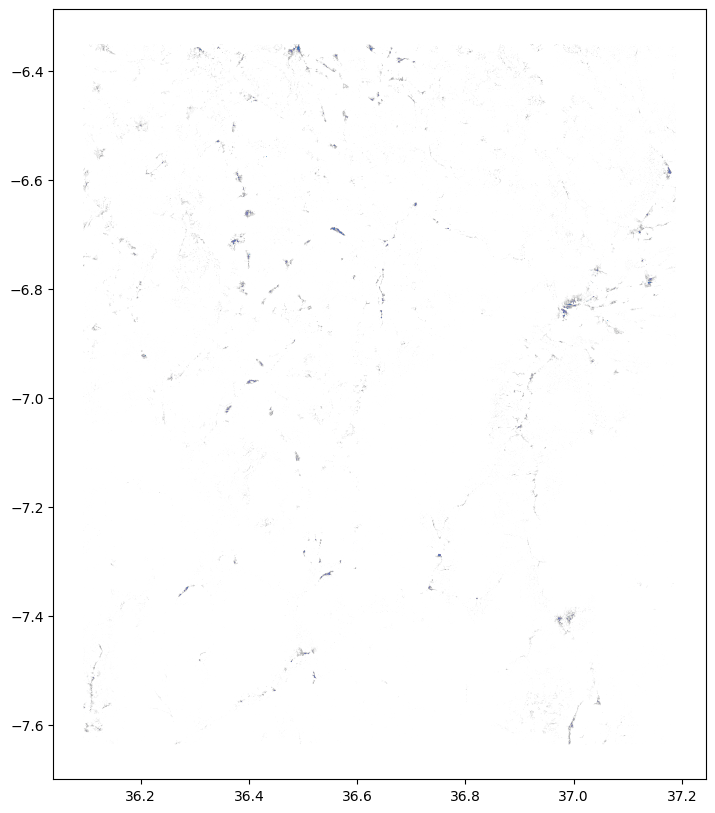

In [4]:
# Quick visualization
buildings.plot(figsize=(10, 10), alpha=0.5)
print(f"Plotted {len(buildings):,} building footprints")

In [5]:
# Verify downloaded data
import geopandas as gpd

buildings = gpd.read_parquet(OUTPUT_PATH)
print(f"Loaded {len(buildings):,} buildings")
print(f"CRS: {buildings.crs}")
print(f"Columns: {buildings.columns.tolist()}")
print(f"\nSample:")
buildings.head()

Loaded 342,791 buildings
CRS: OGC:CRS84
Columns: ['id', 'geometry', 'version', 'sources', 'level', 'subtype', 'class', 'height', 'names', 'has_parts', 'is_underground', 'num_floors', 'num_floors_underground', 'min_height', 'min_floor', 'facade_color', 'facade_material', 'roof_material', 'roof_shape', 'roof_direction', 'roof_orientation', 'roof_color', 'roof_height']

Sample:


,id,geometry,version,sources,level,subtype,class,height,names,has_parts,...,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height
0,923fd027-63a1-4c87-94a1-c2b635001e05,"POLYGON ((36.09722 -7.34805, 36.09726 -7.34806...",1,"[{'property': '', 'dataset': 'Google Open Buil...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
1,f9805369-ac1f-4236-9c20-70d4e0aa79af,"POLYGON ((36.11368 -7.34945, 36.11369 -7.34941...",1,"[{'property': '', 'dataset': 'Google Open Buil...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
2,2ea739b8-aebc-453d-ac9e-b2436582e591,"POLYGON ((36.12622 -7.38243, 36.12624 -7.38239...",1,"[{'property': '', 'dataset': 'Google Open Buil...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
3,4fb4a7d6-7091-4e82-98ce-916f869a2095,"POLYGON ((36.1284 -7.38018, 36.12843 -7.38017,...",1,"[{'property': '', 'dataset': 'Google Open Buil...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
4,ef3ab3c7-033e-49af-9ea3-6c4db8de1fab,"POLYGON ((36.13529 -7.3818, 36.13533 -7.38182,...",3,"[{'property': '', 'dataset': 'Microsoft ML Bui...",NaN,None,None,NaN,None,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN


In [9]:
buildings['sources'][0]


array([{'property': '', 'dataset': 'Google Open Buildings', 'license': None, 'record_id': '6G4RM32W+QVQ9', 'update_time': '2023-05-01T00:00:00.000Z', 'confidence': 0.652, 'between': None}],
      dtype=object)

In [10]:
#open downloaded file and check sources column

In [12]:
buildings = gpd.read_parquet(r"G:\Shared drives\TZ-CCT_RUBEV-0825\Data\1_Baseline\0.4_listing_geospatial\01_input_data\base_layers\overture_buildings.parquet")
buildings['sources'][0]


array([{'property': '', 'dataset': 'Google Open Buildings', 'license': None, 'record_id': '6G4RM32W+QVQ9', 'update_time': '2023-05-01T00:00:00.000Z', 'confidence': 0.652, 'between': None}],
      dtype=object)